In [86]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from aux_funcs import parse_string_with_regex, ordered_colors_from_cmap

plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2.0

AVERAGING_SIZE = 20

In [87]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data

def gen_sort_key(regex, start=1):
    def f(name):
        name = name.replace('\\', '/')
        parsed_components = parse_string_with_regex(name, regex)[start:]
        var_noise = float(parsed_components[0])
        activity_weight = float(parsed_components[1])
        return var_noise, activity_weight
    return f
    

0.066275
0.062224999999999996
0.017975
0.0181



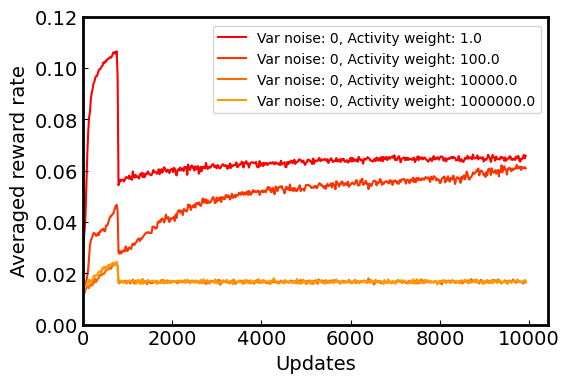

In [64]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_penalty_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

blues = ordered_colors_from_cmap('autumn', 4, cmap_range=(0, 0.6))
d_idx = 0

for data_dir in sorted(glob.glob(data_dir_regex), key=gen_sort_key(data_dir_regex)):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    if var_noise != 1e6 or activity_weight < 1e-3:
        continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    # axs.fill_between(
    #     np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    #     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     alpha=0.2,
    #     zorder=1,
    # )

    axs.plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {0}, Activity weight: {activity_weight}',
        color=blues[d_idx],
    )

    print(np.mean(reduced_data.T, axis=1)[100:].max())

    d_idx += 1

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875), prop={'size': 10})
print()

0.066275
0.0663
0.061112500000000014
0.03608750000000001



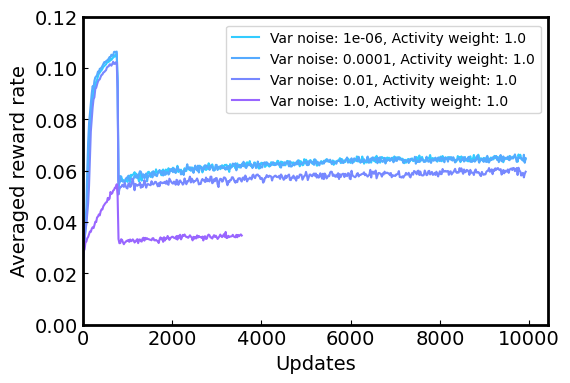

In [63]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_weight_corrected_var_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

oranges = ordered_colors_from_cmap('cool', 4, cmap_range=(0.2, 0.6))

for d_idx, data_dir in enumerate(sorted(glob.glob(data_dir_regex), key=gen_sort_key(data_dir_regex))):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    # if var_noise != 1e6 or activity_weight < 1e-3:
    #     continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    # axs.fill_between(
    #     np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    #     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     alpha=0.2,
    #     zorder=1,
    #     color=blues[d_idx],
    # )

    axs.plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {var_noise}, Activity weight: {activity_weight}',
        color=oranges[d_idx],
    )

    print(np.mean(reduced_data.T, axis=1)[100:].max())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875), prop={'size': 10})
print()

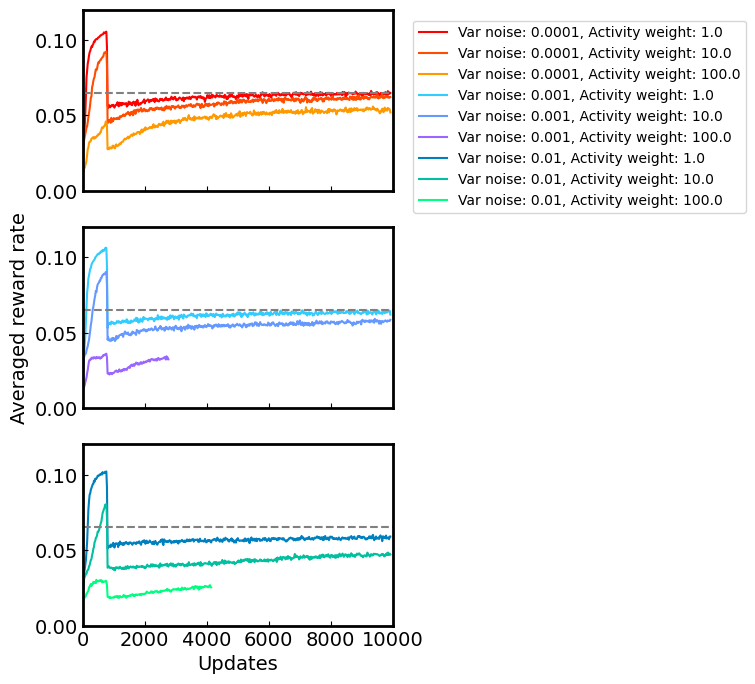

In [96]:
data_dir_regex = '../data/rl_agent_outputs/det_reward_to_stoch_noise_activity_penalty_joint_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(3, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

blues = ordered_colors_from_cmap('autumn', 3, cmap_range=(0, 0.6))
oranges = ordered_colors_from_cmap('cool', 3, cmap_range=(0.2, 0.6))
greens = ordered_colors_from_cmap('winter', 3, cmap_range=(0.5, 1))

colors = np.concatenate([blues, oranges, greens], axis=0)


for d_idx, data_dir in enumerate(sorted(glob.glob(data_dir_regex), key=gen_sort_key(data_dir_regex))):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    # if var_noise != 1e6 or activity_weight < 1e-3:
    #     continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    # axs.fill_between(
    #     np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    #     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     alpha=0.2,
    #     zorder=1,
    #     color=colors[d_idx],
    # )

    axs[int(d_idx / 3)].plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {var_noise}, Activity weight: {activity_weight}',
        color=colors[d_idx],
        lw=1.5
    )

    # print(np.mean(reduced_data.T, axis=1)[100:].max())

    if d_idx % 3 == 0:
        axs[int(d_idx / 3)].plot([0, 1e4], [0.065, 0.065], '--', c='gray')
        axs[int(d_idx / 3)].tick_params(axis='both', direction='in')

axs[0].set_ylim(0, 0.12)
axs[0].set_xlim(0, 1e4)
axs[1].set_ylabel('Averaged reward rate')
axs[2].set_xlabel('Updates')
fig.legend(bbox_to_anchor=(1.8, 0.875), prop={'size': 10})
print()

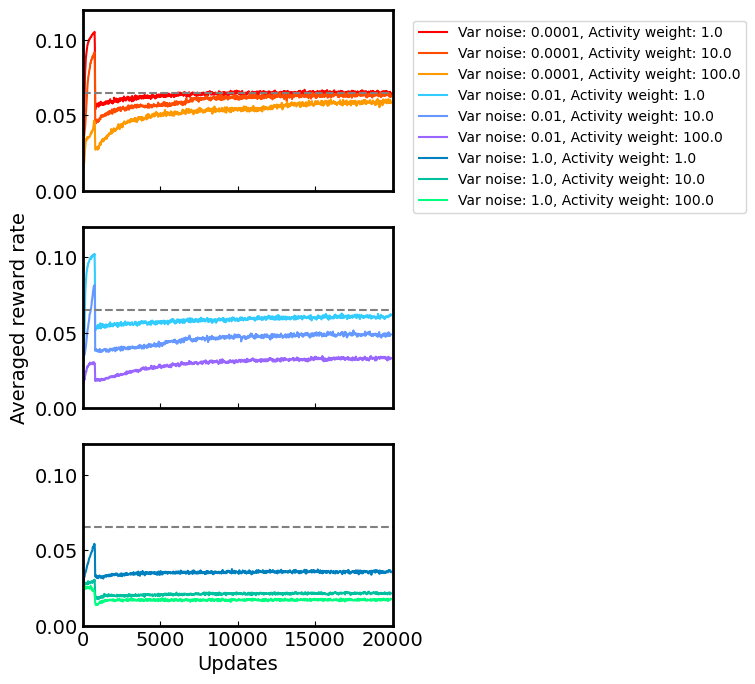

In [98]:
data_dir_regex = '../data/rl_agent_outputs/noise_activity_regularizaton_grid_search_20k_*_var_noise_*_activity_weight_*/reward_rates'

scale = 1
fig, axs = plt.subplots(3, 1, figsize=(4 * scale, 8 * scale), sharex=True, sharey=True)

blues = ordered_colors_from_cmap('autumn', 3, cmap_range=(0, 0.6))
oranges = ordered_colors_from_cmap('cool', 3, cmap_range=(0.2, 0.6))
greens = ordered_colors_from_cmap('winter', 3, cmap_range=(0.5, 1))

colors = np.concatenate([blues, oranges, greens], axis=0)


for d_idx, data_dir in enumerate(sorted(glob.glob(data_dir_regex), key=gen_sort_key(data_dir_regex))):
    data_dir = data_dir.replace('\\', '/')
    parsed_components = parse_string_with_regex(data_dir, data_dir_regex)[1:]

    var_noise = float(parsed_components[0])
    activity_weight = float(parsed_components[1])

    # if var_noise != 1e6 or activity_weight < 1e-3:
    #     continue
    
    reduced_data = load_data(os.path.join(data_dir, '*.npy'))
    
    # axs.fill_between(
    #     np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    #     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    #     alpha=0.2,
    #     zorder=1,
    #     color=colors[d_idx],
    # )

    axs[int(d_idx / 3)].plot(
        np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
        np.mean(reduced_data.T, axis=1),
        zorder=1,
        label=f'Var noise: {var_noise}, Activity weight: {activity_weight}',
        color=colors[d_idx],
        lw=1.5
    )

    # print(np.mean(reduced_data.T, axis=1)[100:].max())

    if d_idx % 3 == 0:
        axs[int(d_idx / 3)].plot([0, 2e4], [0.065, 0.065], '--', c='gray')
        axs[int(d_idx / 3)].tick_params(axis='both', direction='in')

axs[0].set_ylim(0, 0.12)
axs[0].set_xlim(0, 2e4)
axs[1].set_ylabel('Averaged reward rate')
axs[2].set_xlabel('Updates')
fig.legend(bbox_to_anchor=(1.8, 0.875), prop={'size': 10})
print()